In [179]:
import pandas as pd
import numpy as np
from pathlib import Path
import matplotlib.pyplot as plt
%matplotlib inline

The goal of this analysis is to determine how has fandango movie ratings moved since the article shared by FiveThirtyEight's analysis of movie ratings. We'll attempt to answer the question if there has been a change in fandango's movie ratings in comparison with the other movie rating platforms.

In [180]:
fte_data = Path('./Data/Movie_ratings_2016_17-master/fandango_score_comparison.csv')
#fivethirtyeight_data.exists()
fte_data.exists()
print(str(fte_data))

mr_16_17_data = Path('./Data/Movie_ratings_2016_17-master/movie_ratings_16_17.csv')
mr_16_17_data.exists()
print(str(mr_16_17_data))

Data\Movie_ratings_2016_17-master\fandango_score_comparison.csv
Data\Movie_ratings_2016_17-master\movie_ratings_16_17.csv


Reading in the two files from fandango_score_comparison.csv and movie_ratings_16_17.csv. The later file was scraped by the Dataquest team to show the most popular movies of 2016 and 2017. The former file was the original file from Five Thirty Eight

In [181]:
score_comp = pd.read_csv(fte_data)
score_comp

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Fandango_Stars,Fandango_Ratingvalue,RT_norm,RT_user_norm,...,IMDB_norm,RT_norm_round,RT_user_norm_round,Metacritic_norm_round,Metacritic_user_norm_round,IMDB_norm_round,Metacritic_user_vote_count,IMDB_user_vote_count,Fandango_votes,Fandango_Difference
0,Avengers: Age of Ultron (2015),74,86,66,7.1,7.8,5.0,4.5,3.70,4.30,...,3.90,3.5,4.5,3.5,3.5,4.0,1330,271107,14846,0.5
1,Cinderella (2015),85,80,67,7.5,7.1,5.0,4.5,4.25,4.00,...,3.55,4.5,4.0,3.5,4.0,3.5,249,65709,12640,0.5
2,Ant-Man (2015),80,90,64,8.1,7.8,5.0,4.5,4.00,4.50,...,3.90,4.0,4.5,3.0,4.0,4.0,627,103660,12055,0.5
3,Do You Believe? (2015),18,84,22,4.7,5.4,5.0,4.5,0.90,4.20,...,2.70,1.0,4.0,1.0,2.5,2.5,31,3136,1793,0.5
4,Hot Tub Time Machine 2 (2015),14,28,29,3.4,5.1,3.5,3.0,0.70,1.40,...,2.55,0.5,1.5,1.5,1.5,2.5,88,19560,1021,0.5
5,The Water Diviner (2015),63,62,50,6.8,7.2,4.5,4.0,3.15,3.10,...,3.60,3.0,3.0,2.5,3.5,3.5,34,39373,397,0.5
6,Irrational Man (2015),42,53,53,7.6,6.9,4.0,3.5,2.10,2.65,...,3.45,2.0,2.5,2.5,4.0,3.5,17,2680,252,0.5
7,Top Five (2014),86,64,81,6.8,6.5,4.0,3.5,4.30,3.20,...,3.25,4.5,3.0,4.0,3.5,3.5,124,16876,3223,0.5
8,Shaun the Sheep Movie (2015),99,82,81,8.8,7.4,4.5,4.0,4.95,4.10,...,3.70,5.0,4.0,4.0,4.5,3.5,62,12227,896,0.5
9,Love & Mercy (2015),89,87,80,8.5,7.8,4.5,4.0,4.45,4.35,...,3.90,4.5,4.5,4.0,4.5,4.0,54,5367,864,0.5


In [182]:
movie_ratings = pd.read_csv(mr_16_17_data)
movie_ratings

,movie,year,metascore,imdb,tmeter,audience,fandango,n_metascore,n_imdb,n_tmeter,n_audience,nr_metascore,nr_imdb,nr_tmeter,nr_audience
0,10 Cloverfield Lane,2016,76,7.2,90,79,3.5,3.80,3.60,4.50,3.95,4.0,3.5,4.5,4.0
1,13 Hours,2016,48,7.3,50,83,4.5,2.40,3.65,2.50,4.15,2.5,3.5,2.5,4.0
2,A Cure for Wellness,2016,47,6.6,40,47,3.0,2.35,3.30,2.00,2.35,2.5,3.5,2.0,2.5
3,A Dog's Purpose,2017,43,5.2,33,76,4.5,2.15,2.60,1.65,3.80,2.0,2.5,1.5,4.0
4,A Hologram for the King,2016,58,6.1,70,57,3.0,2.90,3.05,3.50,2.85,3.0,3.0,3.5,3.0
5,A Monster Calls,2016,76,7.5,87,84,4.0,3.80,3.75,4.35,4.20,4.0,4.0,4.5,4.0
6,A Street Cat Named Bob,2016,54,7.4,77,79,4.5,2.70,3.70,3.85,3.95,2.5,3.5,4.0,4.0
7,Alice Through the Looking Glass,2016,34,6.2,30,50,4.0,1.70,3.10,1.50,2.50,1.5,3.0,1.5,2.5
8,Allied,2016,60,7.1,61,66,4.0,3.00,3.55,3.05,3.30,3.0,3.5,3.0,3.5
9,Amateur Night,2016,38,5.0,0,27,3.5,1.90,2.50,0.00,1.35,2.0,2.5,0.0,1.5


Lets try to isolate what we are going to focus on. First we'll narrow down the features pertinent to Fandango from the original analysis.

In [183]:
score_comp = score_comp.loc[:,['FILM', 'Fandango_Stars','Fandango_Ratingvalue','Fandango_votes','Fandango_Difference']]
score_comp['year'] = score_comp['FILM'].str[-5:].str.replace(')','')
score_comp

,FILM,Fandango_Stars,Fandango_Ratingvalue,Fandango_votes,Fandango_Difference,year
0,Avengers: Age of Ultron (2015),5.0,4.5,14846,0.5,2015
1,Cinderella (2015),5.0,4.5,12640,0.5,2015
2,Ant-Man (2015),5.0,4.5,12055,0.5,2015
3,Do You Believe? (2015),5.0,4.5,1793,0.5,2015
4,Hot Tub Time Machine 2 (2015),3.5,3.0,1021,0.5,2015
5,The Water Diviner (2015),4.5,4.0,397,0.5,2015
6,Irrational Man (2015),4.0,3.5,252,0.5,2015
7,Top Five (2014),4.0,3.5,3223,0.5,2014
8,Shaun the Sheep Movie (2015),4.5,4.0,896,0.5,2015
9,Love & Mercy (2015),4.5,4.0,864,0.5,2015


Next we'll do our the scraped dataset.

In [184]:
movie_ratings = movie_ratings.loc[:,['movie','year','fandango']]
movie_ratings

,movie,year,fandango
0,10 Cloverfield Lane,2016,3.5
1,13 Hours,2016,4.5
2,A Cure for Wellness,2016,3.0
3,A Dog's Purpose,2017,4.5
4,A Hologram for the King,2016,3.0
5,A Monster Calls,2016,4.0
6,A Street Cat Named Bob,2016,4.5
7,Alice Through the Looking Glass,2016,4.0
8,Allied,2016,4.0
9,Amateur Night,2016,3.5


You'll notice that the movies from the original versus the scraped set are really two different datasets. This is because we elected to represent the most 'popular' dataset, therefore it wasn't really random. Yes, it's a setback, but we can keep moving forward. We just need to revise our approach and look for a proxy to our original question that statisfies our intent. Here are a few ways to see that might work:
* Has there been a difference between Fandango's Rating for popular movies between 2015 and 2016?

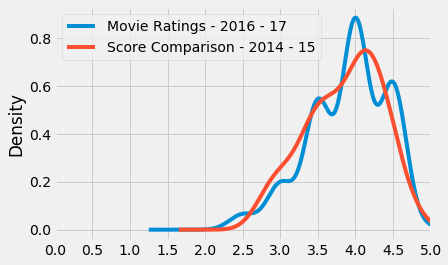

In [185]:
plt.style.use('fivethirtyeight')
movie_ratings['fandango'].plot.kde(label='Movie Ratings - 2016 - 17')
score_comp['Fandango_Ratingvalue'].plot.kde(label='Score Comparison - 2014 - 15')
plt.xlim((1,5))
plt.xticks([0, 0.5, 1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0, 4.5, 5.0])
plt.legend()

Here are a few questions to think about:
* Both distributions look similar in that they have a left skew. The data post aritcle shows a lowered score that is much closer to 4 than 4.5. There does appear to be a change but not that much. We would need to look at other factors as well. Looking at the two frequency distributions of the ratings by year could tell us how about where do votes generally fall by the year.

## Looking at frequency distributions of scores each year.

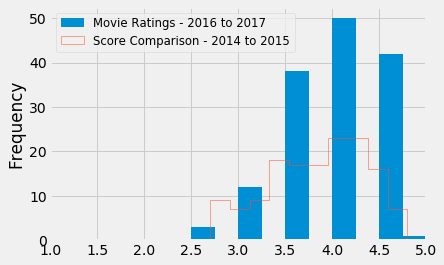

In [186]:
movie_ratings.loc[0:145,:]['fandango'].plot.hist(label='Movie Ratings - 2016 to 2017')
score_comp['Fandango_Ratingvalue'].plot.hist(label='Score Comparison - 2014 to 2015', histtype='step')
plt.xlim((1,5))
plt.legend(loc='best', fontsize='small')

Interesting, here are our observations that i see:
* It appears as though the there are higher frequencies of movie ratings compared to the earlier years.
* It appears that although FiveThirtyEight dataset has lower frequencies it accounts for values in between the half point intervals; whereas the 2016 to 2017 dataset only has values for **at** half point intervals. Let's see if we can adjust the lower comparison dataset to compare apples to apples.

In order to make it an even comparison, we can set the bin parameter of the histogram plot so that the 2014 to 2015 dataset can be summarized the same we that we see the 2016 to 2017 data is summarized. We also can lower the number of movies so that the dataset match more closely.

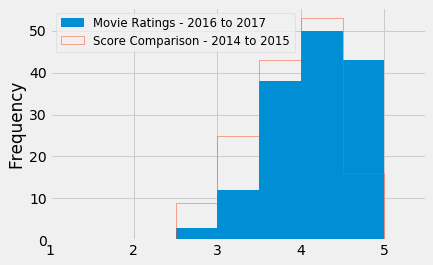

In [187]:
b = [0, 0.5, 1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0, 4.5, 5.0]
movie_ratings.loc[0:145,:]['fandango'].plot.hist(label='Movie Ratings - 2016 to 2017', bins=b)
score_comp['Fandango_Ratingvalue'].plot.hist(label='Score Comparison - 2014 to 2015', histtype='step', bins=b)
plt.xlim((1,5.5))
plt.legend(loc='best', fontsize='small')

Hmmm, it looks like most of the movie ratings that are later had higher ratings. This could be because we trimmed our 2016_2016 dataset down and biased the the sample to have higher scores. In the hist function we can set the density to **True** in order to tell pandas to show the representation sum equal to 1.

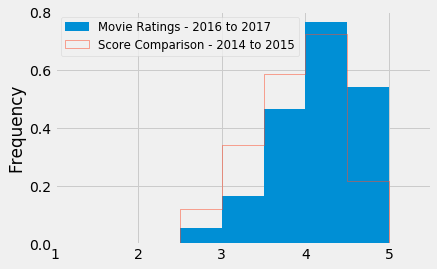

In [188]:
b = [0, 0.5, 1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0, 4.5, 5.0]
movie_ratings['fandango'].plot.hist(label='Movie Ratings - 2016 to 2017', bins=b, density=True)
score_comp['Fandango_Ratingvalue'].plot.hist(label='Score Comparison - 2014 to 2015', histtype='step', bins=b, density=True)
plt.xlim((1,5.5))
plt.legend(loc='best', fontsize='small')

So we see that the later (2017 to 2016) movie ratings have a higher score closer to the conclusions of our first plot with scores that are much higher. Lastly, lets look at the summary statistis of both distributions (we should have started with this).

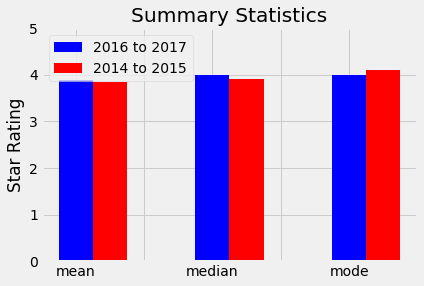

In [189]:
mr_summary = pd.Series([movie_ratings['fandango'].mean(), movie_ratings['fandango'].median(), movie_ratings['fandango'].mode().iloc[0]])
sc_summary = pd.Series([score_comp['Fandango_Ratingvalue'].mean(), score_comp['Fandango_Ratingvalue'].median(), score_comp['Fandango_Ratingvalue'].mode().iloc[0]])

tick_labels=['mean','median','mode']
fig, ax = plt.subplots()

ax.bar([0,1,2], height=mr_summary,label='2016 to 2017', color='blue',width=.25)
ax.bar([0.25,1.25,2.25], height=sc_summary,label='2014 to 2015', color='red',width=.25)
ax.set_xticklabels(['','mean','','median','','mode'])

ax.set_title('Summary Statistics')
ax.set_ylabel('Star Rating')
ax.set_ylim(0,5)
plt.legend()
plt.show()



Limiting the Summary to just 2016 and 2015, in case the the other years were impacted by the score.

In [192]:
movie_ratings = movie_ratings[movie_ratings['year']==2016]
score_comp = score_comp[score_comp['year']=='2015']

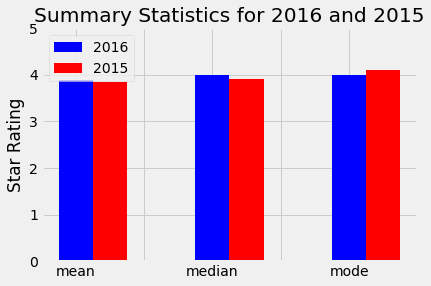

In [193]:

mr_summary = pd.Series([movie_ratings['fandango'].mean(), movie_ratings['fandango'].median(), movie_ratings['fandango'].mode()])
sc_summary = pd.Series([score_comp['Fandango_Ratingvalue'].mean(), score_comp['Fandango_Ratingvalue'].median(), score_comp['Fandango_Ratingvalue'].mode()])
tick_labels=['mean','median','mode']
fig, ax = plt.subplots()

r1 = np.arange(len(mr_summary))
r2 = [x + 0.25 for x in r1]

ax.bar(r1, height=mr_summary,label='2016', color='blue',width=.25)
ax.bar(r2, height=sc_summary,label='2015', color='red',width=.25)
ax.set_xticklabels(['','mean','','median','','mode'])

ax.set_title('Summary Statistics for 2016 and 2015')
ax.set_ylabel('Star Rating')
ax.set_ylim(0,5)
plt.legend()
plt.show()

## Concluding Thoughs...For Now

It does appear that on average the scraped dataset does show a much higher average rating than the one previously collected by fivethirtyeight (prior to the article). However, there are only slight differences between the two datasets so there is doubt that there is a **significant** change. Therefore, its difficult to conclude if there has been any changes since the article.

## Next Steps...Scraping for more recent data